In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('ventes_magasin.csv')
df

,Date,Produit,Catégorie,Quantité Vendue,Prix Unitaire,Total Ventes
0,2024-01-01,Laptop,Électronique,2,1528,3056
1,2024-01-01,Smartphone,Électronique,6,1430,8580
2,2024-01-01,Casque Audio,Accessoires,17,1781,30277
3,2024-01-01,Clavier Mécanique,Accessoires,10,1756,17560
4,2024-01-01,Chaise Gaming,Mobilier,6,1041,6246
...,...,...,...,...,...,...
905,2024-03-31,Écran 27 pouces,Électronique,18,359,6462
906,2024-03-31,Souris Sans Fil,Accessoires,6,1027,6162
907,2024-03-31,Table de Bureau,Mobilier,14,1931,27034
908,2024-03-31,Ventilateur PC,Accessoires,13,1712,22256


In [3]:
# Renommer les colonnes du DataFrame

df.rename(
    inplace=True,
    columns={
        "Date": 'date',
        "Produit": 'produits',
        "Catégorie": 'categorie',
        "Quantité Vendue": 'quantite',
        "Prix Unitaire": "prix",
        "Total Ventes": 'total'
    }
)

df

,date,produits,categorie,quantite,prix,total
0,2024-01-01,Laptop,Électronique,2,1528,3056
1,2024-01-01,Smartphone,Électronique,6,1430,8580
2,2024-01-01,Casque Audio,Accessoires,17,1781,30277
3,2024-01-01,Clavier Mécanique,Accessoires,10,1756,17560
4,2024-01-01,Chaise Gaming,Mobilier,6,1041,6246
...,...,...,...,...,...,...
905,2024-03-31,Écran 27 pouces,Électronique,18,359,6462
906,2024-03-31,Souris Sans Fil,Accessoires,6,1027,6162
907,2024-03-31,Table de Bureau,Mobilier,14,1931,27034
908,2024-03-31,Ventilateur PC,Accessoires,13,1712,22256


In [28]:
# gérer les valeurs manquantes, vérifier les incohérences)

df.isnull().sum()

df.dropna(inplace=True)

# df.drop_duplicates(inplace=True)

df['date'] = pd.to_datetime(df['date'])

df

,date,produits,categorie,quantite,prix,total
0,2024-01-01,Laptop,Électronique,2,1528,3056
1,2024-01-01,Smartphone,Électronique,6,1430,8580
2,2024-01-01,Casque Audio,Accessoires,17,1781,30277
3,2024-01-01,Clavier Mécanique,Accessoires,10,1756,17560
4,2024-01-01,Chaise Gaming,Mobilier,6,1041,6246
...,...,...,...,...,...,...
905,2024-03-31,Écran 27 pouces,Électronique,18,359,6462
906,2024-03-31,Souris Sans Fil,Accessoires,6,1027,6162
907,2024-03-31,Table de Bureau,Mobilier,14,1931,27034
908,2024-03-31,Ventilateur PC,Accessoires,13,1712,22256


In [5]:
# df[ df['produits'] == "Laptop" ]['quantite'].sum()

products = df['produits'].unique()
for product in products:
    sum  = df[ df['produits'] == product ]['quantite'].sum()

    print(product , sum )





Laptop 909
Smartphone 948
Casque Audio 868
Clavier Mécanique 827
Chaise Gaming 925
Écran 27 pouces 873
Souris Sans Fil 924
Table de Bureau 947
Ventilateur PC 934
Disque SSD 1To 890


In [ ]:
# df.info()

df.describe()

sales_products = df.groupby('produits')['quantite'].sum()

sales_products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       910 non-null    datetime64[ns]
 1   produits   910 non-null    object        
 2   categorie  910 non-null    object        
 3   quantite   910 non-null    int64         
 4   prix       910 non-null    int64         
 5   total      910 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 42.8+ KB


In [7]:
produit_le_plus_vendu = sales_products.idxmax()
produit_le_plus_vendu_quantite = sales_products.max()

print(produit_le_plus_vendu, produit_le_plus_vendu_quantite)

Smartphone 948


In [8]:

chiffre_daffaire_par_jour = df.groupby('date')['total'].sum()


chiffre_daffaire_par_jour

date
2024-01-01     98435
2024-01-02     88606
2024-01-03     68826
2024-01-04     84457
2024-01-05    102802
               ...  
2024-03-27    118052
2024-03-28    129940
2024-03-29    116564
2024-03-30    115655
2024-03-31     99386
Name: total, Length: 91, dtype: int64

In [9]:
max_chiffre_daffaire_par_jour = chiffre_daffaire_par_jour.max()
max_chiffre_daffaire_par_jour_date = chiffre_daffaire_par_jour.idxmax()

print(max_chiffre_daffaire_par_jour, max_chiffre_daffaire_par_jour_date)


161449 2024-01-06


In [10]:

chiffre_daffaire_par_categorie = df.groupby('categorie')['total'].sum()

chiffre_daffaire_par_categorie

categorie
Accessoires     3639970
Mobilier        1789893
Électronique    3519236
Name: total, dtype: int64

In [11]:

max_chiffre_daffaire_par_categorie = chiffre_daffaire_par_categorie.max()

max_chiffre_daffaire_par_categorie_nom = chiffre_daffaire_par_categorie.idxmax()

print(max_chiffre_daffaire_par_categorie, max_chiffre_daffaire_par_categorie_nom)

3639970 Accessoires


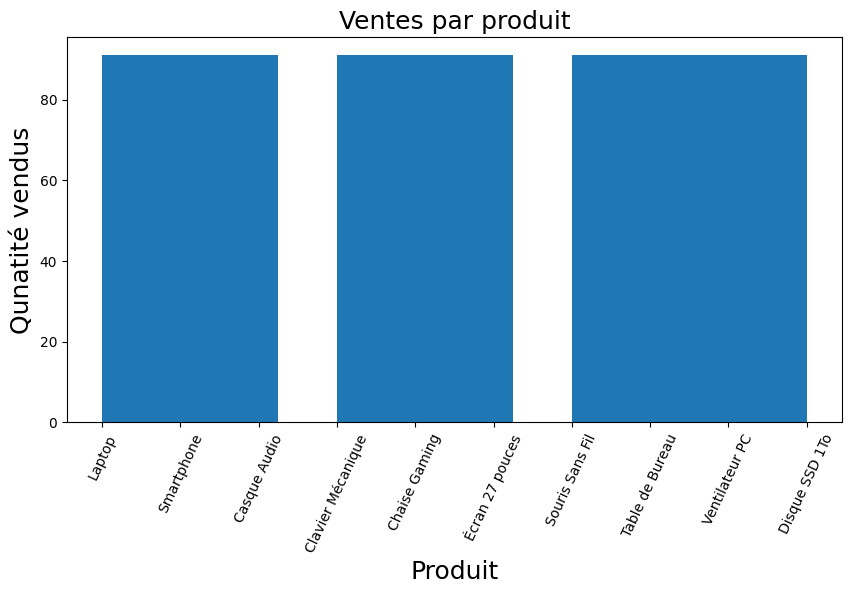

In [ ]:

plt.figure(figsize=(10, 5))

df['produits'].hist(bins=12)

plt.title("Ventes par produit",  fontsize=18)
plt.xlabel("Produits", fontsize=18)
plt.ylabel("Qunatité vendus",  fontsize=18)
plt.xticks(rotation=65)
plt.grid()
plt.show()


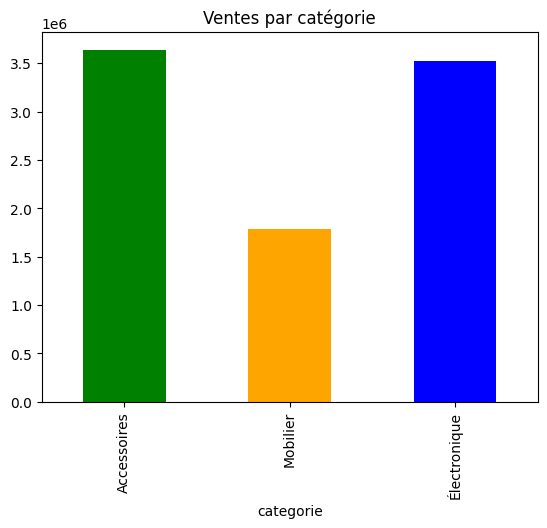

In [25]:
df.groupby('categorie')['total'].sum().plot(kind='bar', color=['green', "orange", 'blue'])
plt.title("Ventes par catégorie")
plt.show()

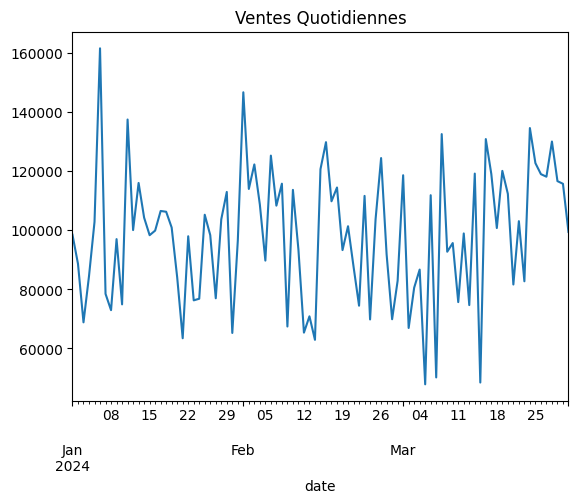

In [30]:
df.groupby('date')['total'].sum().plot(kind='line')
plt.title("Ventes Quotidiennes")
plt.show()